In [8]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cutlets.csv")
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [4]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


H0: Critical Values of Unit A and Unit B are Same at 5% significance level.

Ha: Critical values of Unit A and Unit B are not same at 5% significance level.

Text(0.5, 1.0, 'Unit A at 5% significance level')

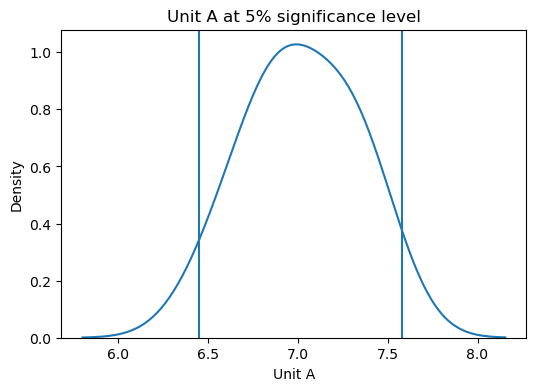

In [16]:
plt.figure(figsize=(6,4))

sns.kdeplot(data=df, x='Unit A',bw_adjust=1.5)

# st.norm.ppf(0.025, df['Unit A'].mean(), df['Unit A'].std())
# 6.45
plt.axvline(6.45)

# st.norm.ppf(1-0.025, df['Unit A'].mean(), df['Unit A'].std())
# 7.58
plt.axvline(7.58)

plt.title('Unit A at 5% significance level')


Text(0.5, 1.0, 'Unit B at 5% significance level')

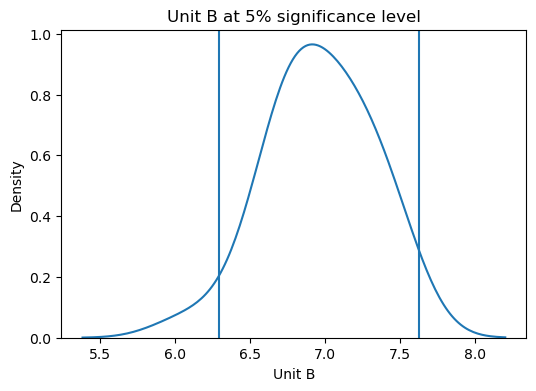

In [21]:
plt.figure(figsize=(6,4))

sns.kdeplot(data=df, x='Unit B',bw_adjust=1.3)

# st.norm.ppf(0.025, df['Unit B'].mean(), df['Unit B'].std())
# 6.29
plt.axvline(6.29)

# st.norm.ppf(1-0.025, df['Unit B'].mean(), df['Unit B'].std())
# 7.63
plt.axvline(7.63)

plt.title('Unit B at 5% significance level')

In [22]:
# As we can see that critical values of Unit A and Unit B does not match. So we reject H0 and accept Ha.
# We can say that there is significance difference between Unit A and Unit B.

# Q.2

In [23]:
lab = pd.read_csv('LabTAT.csv')
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [24]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


## H0: All the report produce same result.
## Ha: Atleast one of them is different

In [26]:
stats.f_oneway(lab['Laboratory 1'],lab['Laboratory 2'],lab['Laboratory 3'],lab['Laboratory 4'])

<IPython.core.display.Javascript object>

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [27]:
# alpha value > pvalue, so we are rejecting H0 in favor of Ha.
# We can say that there is difference in average TAT among the different laboratories at 5% significance level.

# Q3

In [28]:
df3 = pd.read_csv('BuyerRatio.csv')
df3.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


## H0:All proportions are equal

## Ha: Not all proportions are equal

In [30]:
df3.drop(columns=['Observed Values'], axis=1, inplace=True)

In [31]:
st.chi2_contingency(observed=df3)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [32]:
# pvalue > alpha value. We failed to reject H0.

# Q4

In [33]:
df4 = pd.read_csv('Costomer+OrderForm.csv')
df4.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


## H0: All defective are same at 5% significance level.

## Ha: Even one of them contradicts H0.

In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
oe = OrdinalEncoder()
transformed = oe.fit_transform(df4)

In [40]:
st.f_oneway(transformed[0],transformed[1],transformed[2],transformed[3])

F_onewayResult(statistic=0.7999999999999999, pvalue=0.5174037397607774)

In [ ]:
# pvalue > alpha value. Failed to reject H0.